# Verify dataset generated by rmpe_dataset_transformer

In [1]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os,glob

In [2]:
def load(file):
    with open(file,encoding='utf-8') as infile:
        inside=json.load(infile)
    return inside
def save(file,obj):
    with open(file, 'w') as outfile:
        json.dump(obj, outfile)
import math
def rotate(xy, theta):
    # https://en.wikipedia.org/wiki/Rotation_matrix#In_two_dimensions
    cos_theta, sin_theta = math.cos(theta), math.sin(theta)

    return (
        xy[0] * cos_theta - xy[1] * sin_theta,
        xy[0] * sin_theta + xy[1] * cos_theta
    )
def translate(xy, offset):
    return xy[0] + offset[0], xy[1] + offset[1]

def tag_angle(x1,y1,x2,y2):
    #angle in radians
    dx = x1-x2
    dy = y1-y2 
    norm = np.sqrt(dx**2+dy**2)
    up = [dx/norm,dy/norm]
    angle= np.arctan2(up[0], -up[1])#/np.pi*180    
    return angle
def bbox(head,abdomen,size=[90,150]):
    rectangle=[(-size[0],size[1]),(-size[0],-size[1]),(size[0],-size[1]),(size[0],size[1])]

    theta=tag_angle(head[0],head[1],abdomen[0],abdomen[1])
    offset=((head[0]+abdomen[0])/2.,(abdomen[1]+head[1])/2.)

    return [translate(rotate(xy, theta), offset) for xy in rectangle]

In [3]:
bees = load('../data/raw/bee/dataset_raw/train_bee_annotations2018.json')

In [51]:
shrimp = load('../data/raw/shrimp/Shrimp_annotations.json')

# Verify data generator client

In [4]:
%matplotlib inline
import matplotlib.pyplot  as plt
import cv2
import sys
sys.path.append('..')
import beepose.train.ds_client_generator as ds
client = ds.DataGeneratorClient(port=5555, host="localhost", hwm=1, batch_size=10)
client.restart()
batch_index = 0

In [5]:
x,y = next(client.gen())

In [6]:
x[0].shape

(10, 368, 368, 3)

In [7]:
x[1].shape

(10, 46, 46, 38)

In [8]:
print(x[0].shape)
print(x[1].shape)
print(x[2].shape)

print(y[0].shape)
print(y[1].shape)
print(y[2].shape)
print(y[3].shape)
print(y[4].shape)
print(y[5].shape)
print(y[6].shape)
print(y[7].shape)
print(y[8].shape)
print(y[9].shape)
print(y[10].shape)
print(y[11].shape)

(10, 368, 368, 3)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)


In [17]:
x[0].shape

(10, 368, 368, 3)

## Show orig image

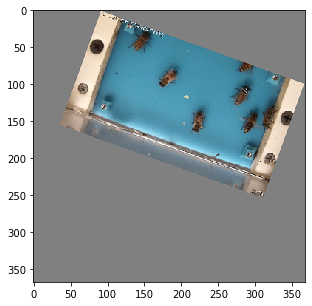

In [25]:
plt.rcParams['figure.figsize'] = 5, 5
#x,y = next(client.gen())
dta_img = x[0][batch_index,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

In [20]:
np.min(dta_img)

0

# Show orig img + mask

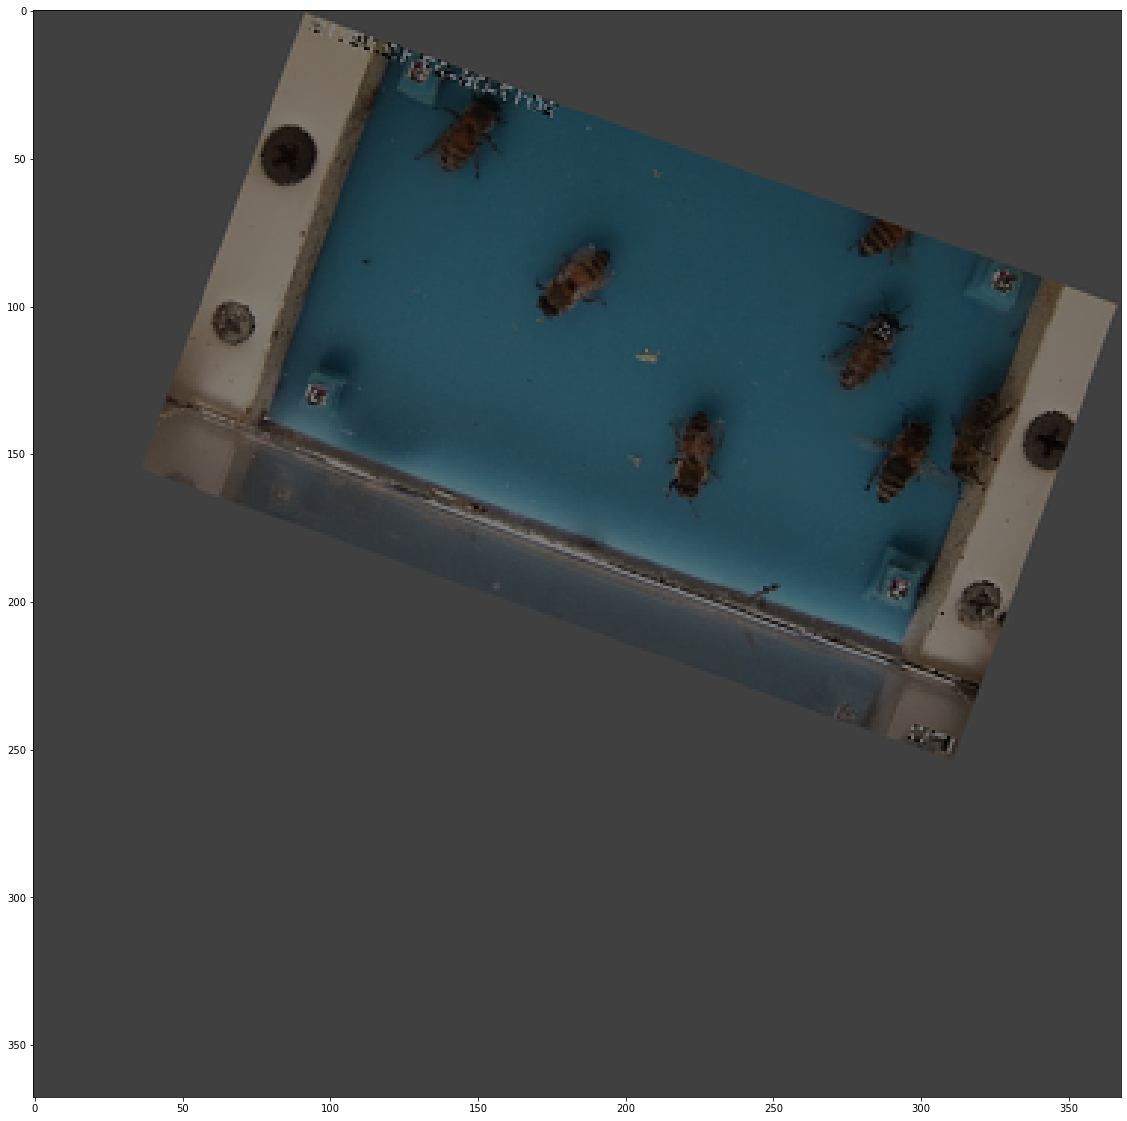

In [11]:
dta_img = x[0][batch_index,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

mask_img = x[1][batch_index,:,:,:]
mask_img = cv2.resize(mask_img[:,:, 0], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)


plt.imshow(mask_img * 255, cmap='gray', alpha=.5)

In [16]:
import numpy as np
np.min(x[2][batch_index,:,:,:])

1.0

# Show heatmap

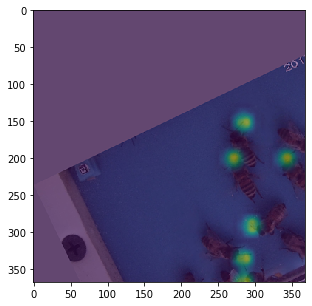

In [46]:
batch_index =0
body_part = 3

x,y = next(client.gen())
dta_img = x[0][batch_index,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

heatmap = cv2.resize(y[1][batch_index, :, :, body_part], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)

plt.imshow(dta_img[:,:,[2,1,0]])
plt.imshow(heatmap[:,:], alpha=.5)

In [24]:
heatmap.dtype

dtype('float64')

## Show PAF

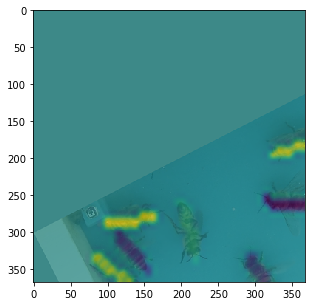

In [62]:
batch_index = 0
paf_idx = 0
x,y = next(client.gen())
dta_img = x[0][batch_index,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

paf = cv2.resize(y[2][batch_index, :, :, paf_idx], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)

plt.imshow(dta_img[:,:,[2,1,0]])
plt.imshow(paf[:,:], alpha=.7)

In [9]:
val_client = DataGeneratorClient(port=5555, host="localhost", hwm=160, batch_size=10)
val_client.start()
val_di = val_client.gen()

In [ ]:
batch_index =0
body_part = 1
dta_img = x[0][batch_index,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

heatmap = cv2.resize(y[1][batch_index, :, :, body_part], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)

plt.imshow(dta_img[:,:,[2,1,0]])
plt.imshow(heatmap[:,:], alpha=.5)

y

In [21]:
U

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

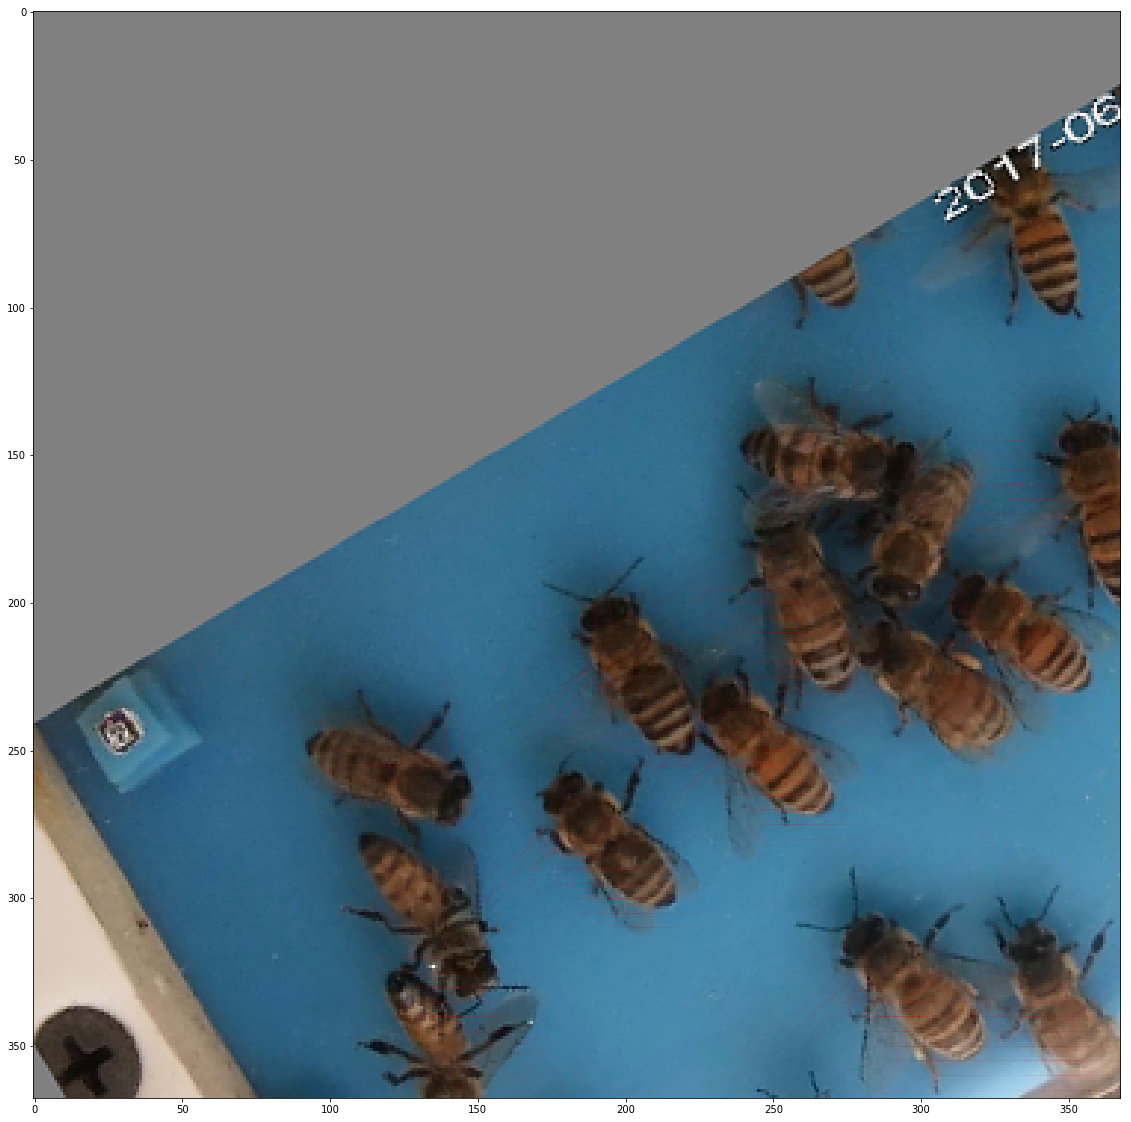

In [25]:
import numpy as np
from numpy import ma
U =cv2.resize(y[2][batch_index, :, :, 1], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
V =cv2.resize(y[2][batch_index, :, :, 2], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]))
#M = np.zeros(U.shape, dtype='bool')
#M[U**2 + V**2 < 0.5 * 0.5] = True
#U = ma.masked_array(U, mask=M)
#V = ma.masked_array(V, mask=M)

# 1
plt.figure()
plt.imshow(dta_img[:,:,[2,1,0]])
s = 5
Q = plt.quiver(X[::s,::s], Y[::s,::s], U[::s,::s], V[::s,::s], 
               scale=10, headaxislength=1, alpha=.5, width=0.0001, color='r')

fig = plt.gcf()
fig.set_size_inches(20, 20)

In [34]:
from src.data.pose_augmenter import *

ModuleNotFoundError: No module named 'src.data.pose_augmenter'

In [26]:
import src.data.pose_augmenter

ModuleNotFoundError: No module named 'src.data.pose_augmenter'

In [33]:
import sys
sys.path.append('..')


ModuleNotFoundError: No module named 'bee_pose_refactor'

In [48]:
train_di = client.gen()

In [52]:
x,y = next(train_di)

In [55]:
len(x)

3